In [107]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [108]:
TIME_STR = "20250724-164044" # Same as above
FOLDER_PATH = f"data/{TIME_STR}"
SERVO_COMMAND_FILE_PATH = f"{FOLDER_PATH}/servo_command.csv"
SERVO_STATE_FILE_PATH = f"{FOLDER_PATH}/servo_state.csv"

NUM_JOINTS = 6
NUM_SERVOS = 7
COLORS = ["red", "orange", "brown", "green", "blue", "purple", "magenta"]
OPACITY_CMD = 1
OPACITY_STATE = 0.3

In [114]:
cmd_data = pd.read_csv(SERVO_COMMAND_FILE_PATH)
# cmd_data

In [110]:
state_data = pd.read_csv(SERVO_STATE_FILE_PATH)
# state_data

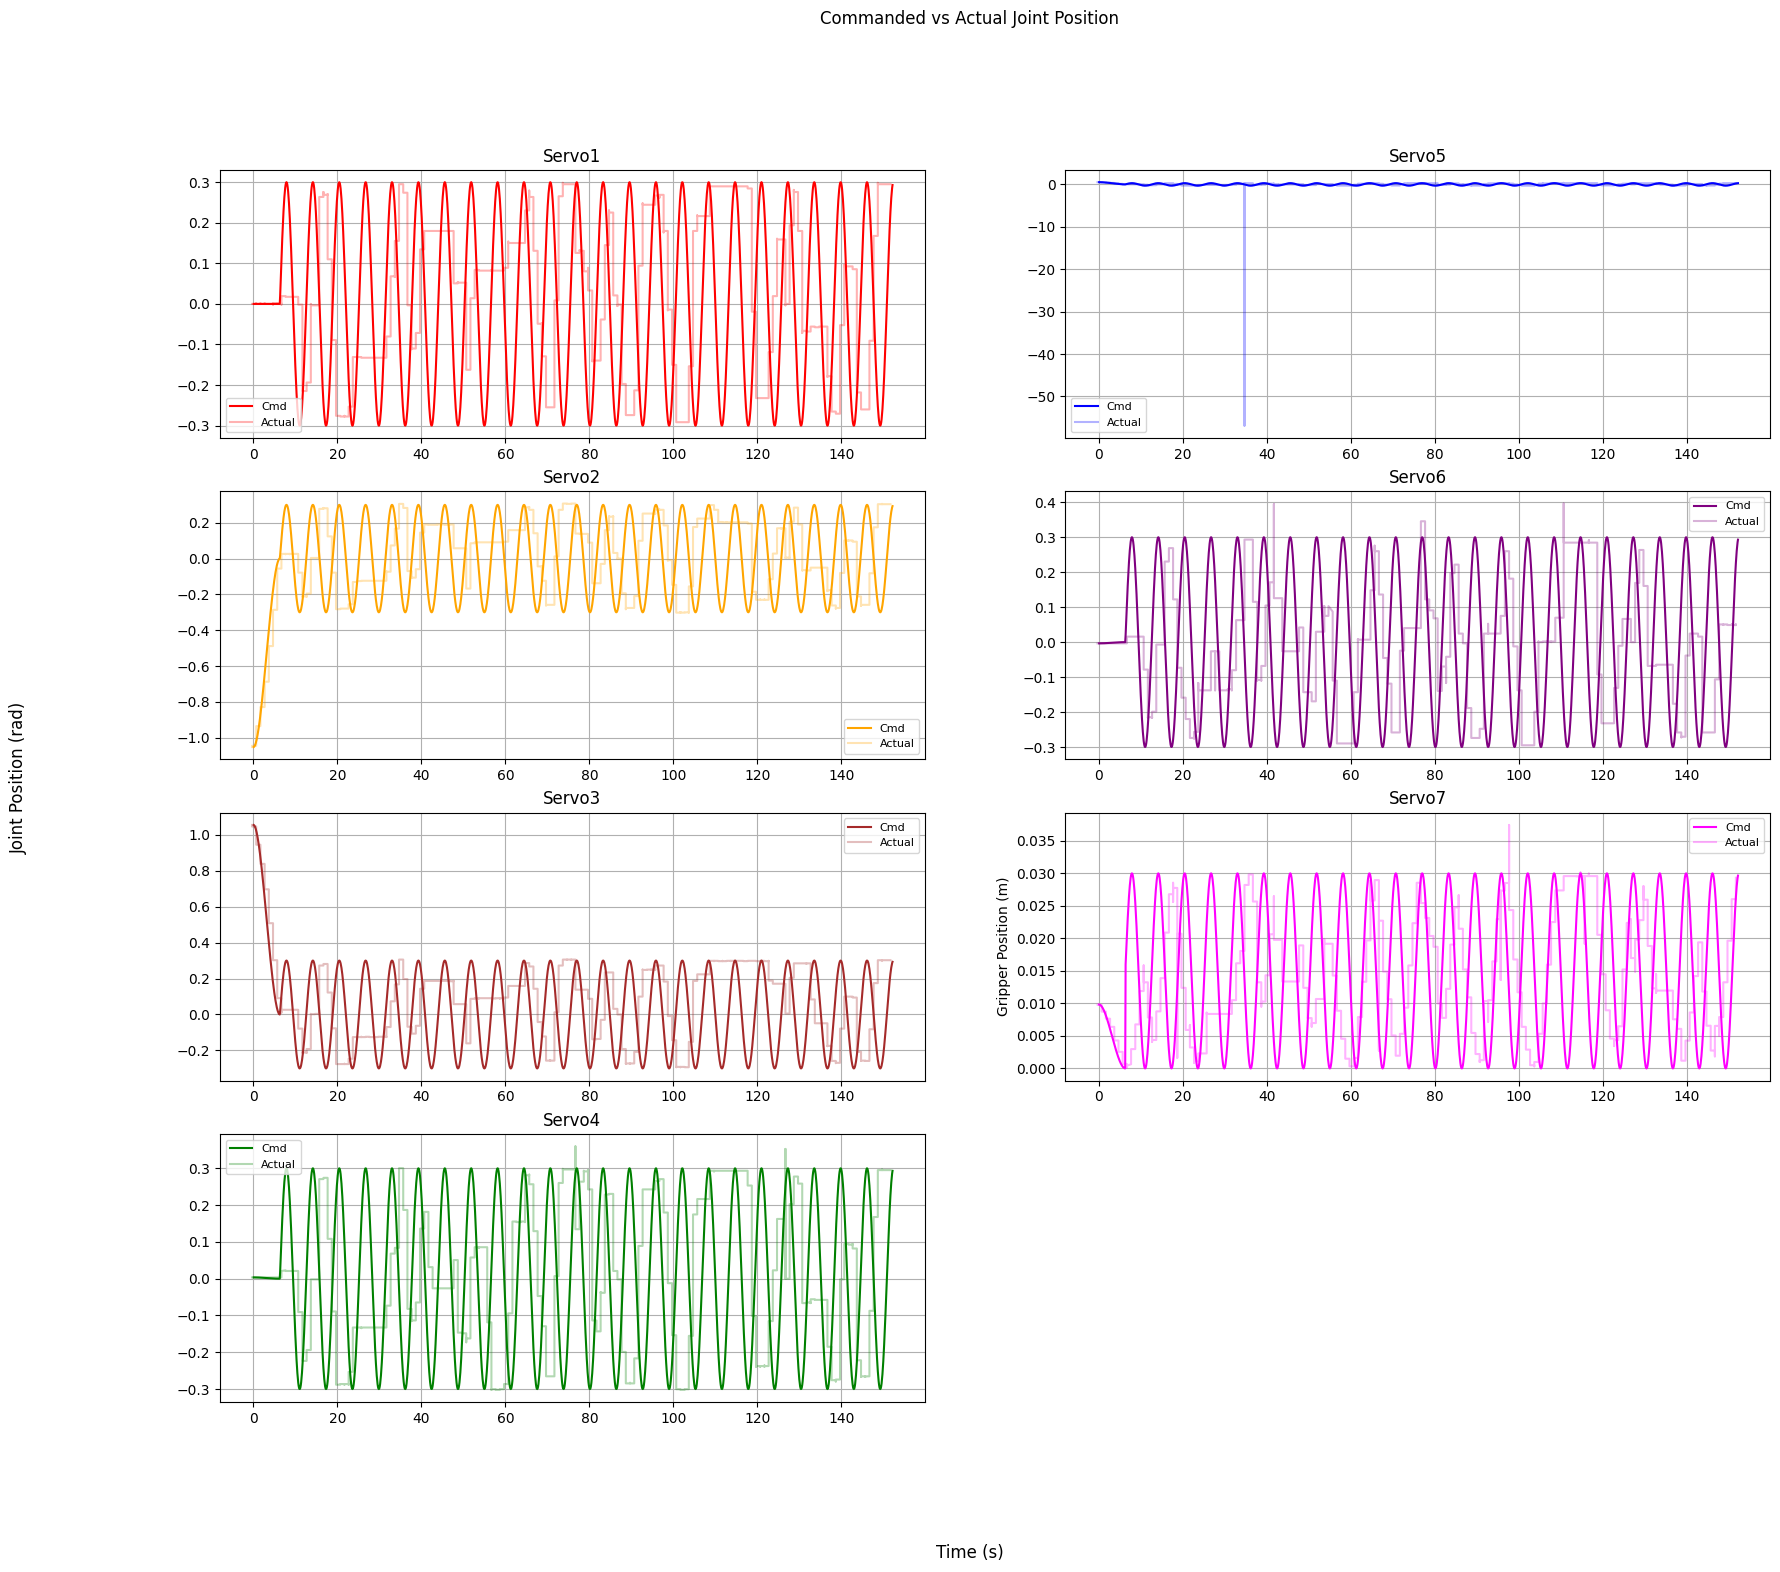

In [120]:
# fig, axes = plt.subplots(2, 4, constrained_layout=True)
fig, axes = plt.subplots(4, 2, figsize=(20, 16))
                         
for i in range(NUM_SERVOS + 1):
    col = i // 4
    row = i % 4

    if i == NUM_SERVOS:
        axes[row, col].set_visible(False)
        break

    # Plot servo{i} from command data
    axes[row, col].plot(
        cmd_data['time'], 
        cmd_data[f'servo{i + 1}'], 
        label='Cmd', 
        color=COLORS[i],
        alpha=OPACITY_CMD
    )

    # Plot servo{i} from state data
    axes[row, col].plot(
        state_data['time'], 
        state_data[f'servo{i + 1}'], 
        label='Actual', 
        color=COLORS[i], 
        alpha=OPACITY_STATE
    )

    axes[row, col].title.set_text(f"Servo{i + 1}")
    axes[row, col].legend(fontsize=8, loc='best')

    if i + 1 == NUM_SERVOS:
        axes[row, col].set_ylabel("Gripper Position (m)")

    axes[row, col].grid()

# Add labels and title
fig.supxlabel('Time (s)')
fig.supylabel('Joint Position (rad)')
fig.suptitle('Commanded vs Actual Joint Position')

plt.show()

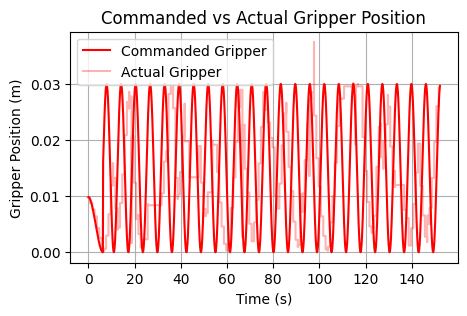

In [112]:
# Create a figure and axis
plt.figure(figsize=(5, 3))


# Plot servo{i} from command data
plt.plot(
    cmd_data['time'], 
    cmd_data[f'servo{NUM_SERVOS}'], 
    label='Commanded Gripper', 
    color=COLORS[0]
)

# Plot servo{i} from state data
plt.plot(
    state_data['time'], 
    state_data[f'servo{NUM_SERVOS}'], 
    label='Actual Gripper', 
    color=COLORS[0], 
    alpha=OPACITY_STATE
)

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Gripper Position (m)')
plt.title('Commanded vs Actual Gripper Position')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

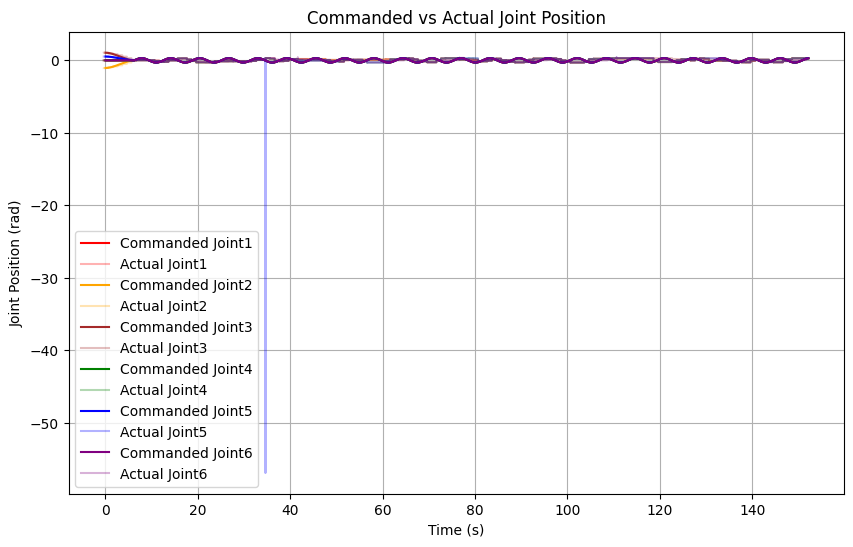

In [113]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

for i in range(NUM_JOINTS):
    # Plot servo{i} from command data
    plt.plot(
        cmd_data['time'], 
        cmd_data[f'servo{i + 1}'], 
        label=f'Commanded Joint{i + 1}', 
        color=COLORS[i]
    )

    # Plot servo{i} from state data
    plt.plot(
        state_data['time'], 
        state_data[f'servo{i + 1}'], 
        label=f'Actual Joint{i + 1}', 
        color=COLORS[i], 
        alpha=OPACITY_STATE
    )

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Joint Position (rad)')
plt.title('Commanded vs Actual Joint Position')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()